<a href="https://colab.research.google.com/github/gmfv/YIO/blob/GioM/PrediccionTemperatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> # Predicción de la temperatura en Paraguay





# Paso en el tiempo unitario

Importamos las librerias necesarias

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
import math
from keras.losses import MeanSquaredError
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gmfv/YIO/main/tas_1991_2016_PRY.csv')

In [3]:
df

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,27.7435,1991,Jan Average,Paraguay,PRY
1,26.7139,1991,Feb Average,Paraguay,PRY
2,26.4794,1991,Mar Average,Paraguay,PRY
3,23.8111,1991,Apr Average,Paraguay,PRY
4,21.4753,1991,May Average,Paraguay,PRY
...,...,...,...,...,...
307,21.5426,2016,Aug Average,Paraguay,PRY
308,21.9060,2016,Sep Average,Paraguay,PRY
309,25.2625,2016,Oct Average,Paraguay,PRY
310,25.0744,2016,Nov Average,Paraguay,PRY


**Arreglamos el Dataset**

In [4]:
copy_df=df.copy()
copy_df = copy_df.drop(copy_df.columns[[3, 4]], axis='columns')
copy_df.set_axis(['Temperatura', 'Anho', 'Mes'], 
                    axis='columns', inplace=True)
copy_df

,Temperatura,Anho,Mes
0,27.7435,1991,Jan Average
1,26.7139,1991,Feb Average
2,26.4794,1991,Mar Average
3,23.8111,1991,Apr Average
4,21.4753,1991,May Average
...,...,...,...
307,21.5426,2016,Aug Average
308,21.9060,2016,Sep Average
309,25.2625,2016,Oct Average
310,25.0744,2016,Nov Average


In [5]:
copy_df['Mes'] = copy_df['Mes'].map({'Dec Average':'12', 'Nov Average':'11', 'Oct Average':'10', 'Oct Average':'9', 'Aug Average':'8', 'Jul Average':'7',
                           'Jun Average':'6', 'May Average':'5', 'Apr Average':'4', 'Mar Average':'3', 'Feb Average':'2', 'Jan Average':'1'}, na_action=None)

In [6]:
plot_cols= copy_df['Temperatura']
plot_cols

0      27.7435
1      26.7139
2      26.4794
3      23.8111
4      21.4753
        ...   
307    21.5426
308    21.9060
309    25.2625
310    25.0744
311    27.1243
Name: Temperatura, Length: 312, dtype: float64

Vemos el grafico de los datos obtenidos

Text(0.5, 0.98, 'Temperatura')

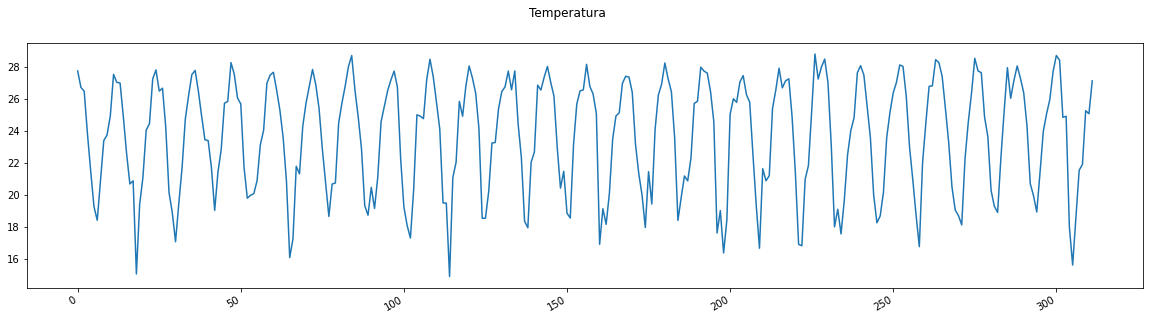

In [7]:
_ = plot_cols.plot(subplots=True, figsize=(20, 5))
plt.suptitle('Temperatura')

Definimos una funcion que nos va a arreglar el dataset en el formato que necesitamos

NO UTILIZAMOS PORQUE YA ESTA ARREGLADO

In [33]:
#def create_dataset(dataset, look_back=1):
#    dataX, dataY = [], []
 #   for i in range(len(dataset)):
#        if i + look_back < len(dataset):
#            dataY.append(dataset[i + look_back, 0])
#        else: 

#            dataY.append(0)
#        a = dataset[i:(i+look_back), 0]
#        dataX.append(a)
#    return numpy.array(dataX), numpy.array(dataY)

IndentationError: ignored

In [8]:
np.random.seed(7)
dataset=copy_df['Temperatura'].values.reshape(-1,1)

Normalizamos

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(dataset)

In [10]:
dataset = scaler.transform(dataset)

In [11]:
X = dataset[:-1]
y = dataset[1:]

In [12]:
n_points = len(dataset)
train_points = int(2/3*n_points)+1
X_train, X_test = X[:train_points], X[train_points:]
y_train, y_test = y[:train_points], y[train_points:]
print("Tenemos ", len(X_train), "muestras de entrenamiento y ", X_test.shape[0], " muestras de prueba")

Tenemos  209 muestras de entrenamiento y  102  muestras de prueba


Las dejamos en el formato 3D ([muestra, time step, feature])

In [13]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)
print(X_test.shape)

(209, 1, 1)
(102, 1, 1)


Definimos nuestro modelo

In [14]:
from keras.layers import LSTM, SimpleRNN
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


Entrenamos

In [52]:
nb_epoch = 1000
history = model.fit(X_train, y_train, epochs=nb_epoch)

Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 3/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0240
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0240
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0240
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0240
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0240
Epoch 10/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 11/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 12/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0240
Epoch 13/1000
7/7 [==============================

Realizamos las predicciones

In [53]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Volvemos a la escala original

In [54]:
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred =scaler.inverse_transform(y_test_pred)

In [55]:
copy_df['RNN Entrenamiento'] = 0
copy_df['RNN Prueba'] = 0
copy_df.loc[1:train_points, 'RNN Entrenamiento'] = y_train_pred
copy_df.loc[train_points+1:, 'RNN Prueba'] = y_test_pred

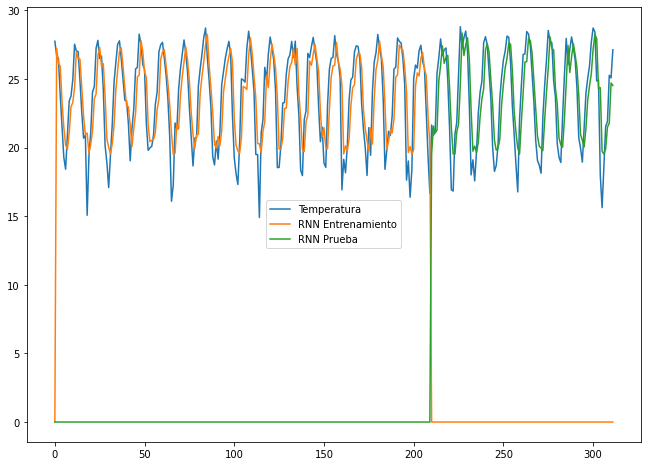

In [56]:
copy_df[['Temperatura', 'RNN Entrenamiento', 'RNN Prueba']].plot()
plt.gcf().set_size_inches(11, 8)

In [57]:
perdida=history.history['loss']
media=sum(perdida)/len(perdida)
media

0.023940053654834627

# Multiples paso en el tiempo

In [58]:
X2 = np.concatenate([X[0:-3], X[1:-2], X[2:-1]], axis=1)
y2 = X[3:]

X2_train, X2_test = X2[:train_points], X2[train_points:]
y2_train, y2_test = y2[:train_points], y2[train_points:]

print("Tenemos", X2_train.shape[0], "muestras de entrenamiento y", X2_test.shape[0], "muestras de prueba")

Tenemos 209 muestras de entrenamiento y 99 muestras de prueba


In [59]:
X2_train = X2_train.reshape(X2_train.shape[0], X2_train.shape[1], 1)
X2_test = X2_test.reshape(X2_test.shape[0], X2_test.shape[1], 1)
print(X2_train.shape)
print(X2_test.shape)

(209, 3, 1)
(99, 3, 1)


In [60]:
model = Sequential()
model.add(LSTM(units=10, input_shape=(X2_train.shape[1], X2_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [64]:
nb_epoch = 500
history2= model.fit(X2_train, y2_train, epochs=nb_epoch, shuffle=False)

Epoch 1/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 10/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 11/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 12/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 13/500
7/7 [==============================] - 0s 2ms/st

In [70]:
perdida=history2.history['loss']
media=sum(perdida)/len(perdida)
media

0.010541089445352553

In [65]:
y_train_pred = model.predict(X2_train)
y_test_pred = model.predict(X2_test)

In [66]:
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred =scaler.inverse_transform(y_test_pred)

In [67]:
copy_df['LSTM3 Entrenamiento'] = 0
copy_df['LSTM3 Prueba'] = 0
copy_df.loc[3:train_points+2, 'LSTM3 Entrenamiento'] = y_train_pred
copy_df.loc[train_points+4:, 'LSTM3 Prueba'] = y_test_pred

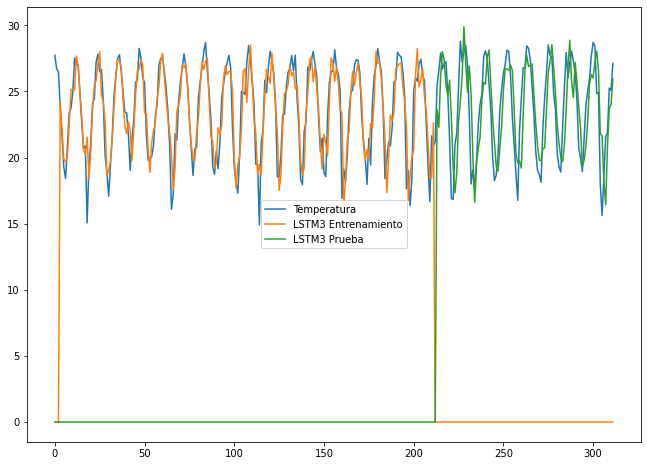

In [ ]:
copy_df[['Temperatura','LSTM3 Entrenamiento',# 'RNN Entrenamiento', 'RNN Prueba', 
         'LSTM3 Prueba']].plot()
plt.gcf().set_size_inches(11, 8)